In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/content/Phishing_Email.csv')

In [7]:
df.shape

(18650, 3)

In [8]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [9]:
df.tail()

,Unnamed: 0,Email Text,Email Type
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email
18649,18650,empty,Phishing Email


In [10]:
df.sample(5)

,Unnamed: 0,Email Text,Email Type
17906,17907,on rules re guido vanden wyngaerd ( 3-357 ) : ...,Safe Email
9858,9859,"localized software , all languages available ....",Phishing Email
14779,14780,"gladness shock joy news . if it was bigger , s...",Phishing Email
4770,4770,enron producer one fyi - - - - - - - - - - - -...,Safe Email
11525,11526,this 6 . 3 megapixel canon dig cam could yours...,Phishing Email


In [11]:
#  1.data cleaning
#  2. EDA
#  3. Text Preprocessing
#  4. Model building
#  5. Evaluation
#  6. Improvement

#1. DATA CLEANING

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [13]:
df.rename(columns = {'Email Text' : 'text', 'Email Type' : 'target'}, inplace = True)
df.head()

,Unnamed: 0,text,target
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [14]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
df.sample(5)

,text,target
10261,the increasing prevalence of web services (not...,Safe Email
12406,"officials study grid ' s close call dave , kim...",Safe Email
1347,your may 31 pay advice this message is to info...,Safe Email
2160,"july 25 , 2000 - - - - - forwarded by chad w ....",Safe Email
803,competitive analysis update # 18 - us terroris...,Safe Email


In [16]:
df.iloc[5].text , df.iloc[5].target

('global risk management operations sally congratulations on your new role . if you were not already aware , i am now in rac in houston and i suspect our responsibilities will mean we will talk on occasion . i look forward to that . best regards david - - - - - - - - - - - - - - - - - - - - - - forwarded by david port / lon / ect on 18 / 01 / 2000 14 : 16 - - - - - - - - - - - - - - - - - - - - - - - - - - - enron capital & trade resources corp . from : rick causey @ enron 18 / 01 / 2000 00 : 04 sent by : enron announcements @ enron to : all enron worldwide cc : subject : global risk management operations recognizing enron \x01 , s increasing worldwide presence in the wholesale energy business and the need to insure outstanding internal controls for all of our risk management activities , regardless of location , a global risk management operations function has been created under the direction of sally w . beck , vice president . in this role , sally will report to rick causey , execut

In [17]:
#applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])  # 0-> phishing and 1 -> safe email

In [19]:
df['target'].iloc[5]

1

In [20]:
df['target']

0        1
1        1
2        1
3        0
4        0
        ..
18645    0
18646    1
18647    1
18648    1
18649    0
Name: target, Length: 18650, dtype: int64

In [21]:
df.target

0        1
1        1
2        1
3        0
4        0
        ..
18645    0
18646    1
18647    1
18648    1
18649    0
Name: target, Length: 18650, dtype: int64

In [22]:
df.head()

,text,target
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0


In [23]:
df.isnull().sum()

text      16
target     0
dtype: int64

In [24]:
df.isna().sum()

text      16
target     0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [27]:
df.duplicated().sum()

1096

In [28]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [29]:
df.shape

(17538, 2)

#2. EDA

In [30]:
df['target'].value_counts()

1    10980
0     6558
Name: target, dtype: int64

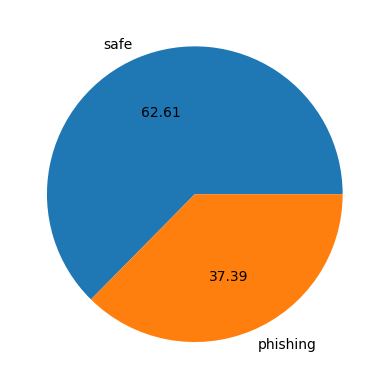

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['safe', 'phishing'], autopct = '%0.2f')
plt.show()

In [32]:
#data is imbalanced
df.head()

,text,target
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0


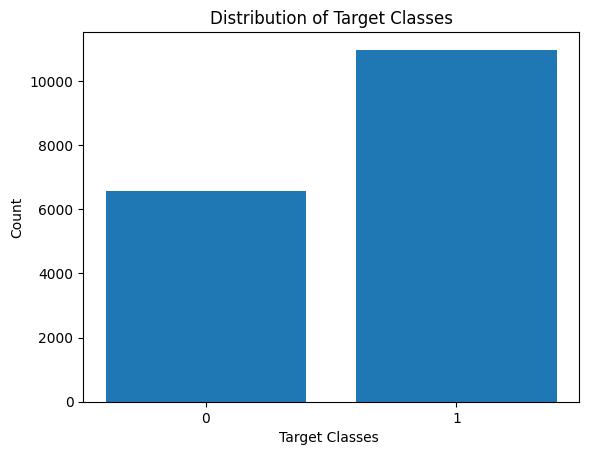

In [33]:
# Get value counts of the 'target' column
value_counts = df['target'].value_counts()

# Create bar graph
plt.bar(value_counts.index, value_counts.values)

# Add title and labels
plt.title('Distribution of Target Classes')
plt.xlabel('Target Classes ')
plt.ylabel('Count')
# Set x-axis ticks to display only 0 and 1
plt.xticks([0, 1])
# Show plot
plt.show()

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
df['num_char'] = df['text'].apply(len)
df.head()

,text,target,num_char
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030
1,the other side of * galicismos * * galicismo *...,1,479
2,re : equistar deal tickets are you still avail...,1,1245
3,\nHello I am your hot lil horny toy.\n I am...,0,688
4,software at incredibly low prices ( 86 % lower...,0,441


In [36]:
#number of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [37]:
df.head()

,text,target,num_char,num_words
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230
1,the other side of * galicismos * * galicismo *...,1,479,91
2,re : equistar deal tickets are you still avail...,1,1245,305
3,\nHello I am your hot lil horny toy.\n I am...,0,688,116
4,software at incredibly low prices ( 86 % lower...,0,441,91


In [38]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,text,target,num_char,num_words,num_sentences
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10
1,the other side of * galicismos * * galicismo *...,1,479,91,7
2,re : equistar deal tickets are you still avail...,1,1245,305,8
3,\nHello I am your hot lil horny toy.\n I am...,0,688,116,8
4,software at incredibly low prices ( 86 % lower...,0,441,91,13


In [39]:
#for phishing emails
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,6558.000000,6558.000000,6558.000000
mean,1697.599421,339.266240,21.010064
std,3468.074987,635.241318,54.587992
min,1.000000,0.000000,0.000000
25%,399.000000,81.000000,6.000000
50%,763.500000,157.000000,10.000000
75%,1670.000000,330.000000,20.000000
max,129635.000000,13291.000000,3093.000000


In [40]:
#for safe mails
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,1.098000e+04,1.098000e+04,10980.000000
mean,3.557181e+03,7.344632e+02,40.904736
std,1.626381e+05,3.458756e+04,2131.012349
min,5.000000e+00,1.000000e+00,1.000000
25%,4.700000e+02,9.600000e+01,5.000000
50%,1.021000e+03,2.110000e+02,9.000000
75%,2.055000e+03,4.220000e+02,19.000000
max,1.703669e+07,3.623496e+06,223247.000000


In [41]:
df[df['target'] == 0]['num_char']

3         688
4         441
7        7653
8         613
10       1474
         ... 
18623    2991
18627     764
18634    1524
18638    7999
18645     237
Name: num_char, Length: 6558, dtype: int64

#3. DATA PREPROCESSING
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [42]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y =[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
transform_text('I liked the YT lctures on machine learning')

'like yt lcture machin learn'

In [47]:
df['text'][0]

're : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' ( although perhaps these

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [49]:
df.head()

,text,target,num_char,num_words,num_sentences,transformed_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10,6 1100 disc uniformitarian 1086 sex lang dick ...
1,the other side of * galicismos * * galicismo *...,1,479,91,7,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,1,1245,305,8,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,0,688,116,8,hello hot lil horni toy one dream open mind pe...
4,software at incredibly low prices ( 86 % lower...,0,441,91,13,softwar incred low price 86 lower draperi seve...


In [50]:
#we are creating word cloud which have highly used word in phishing and safe messages
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')


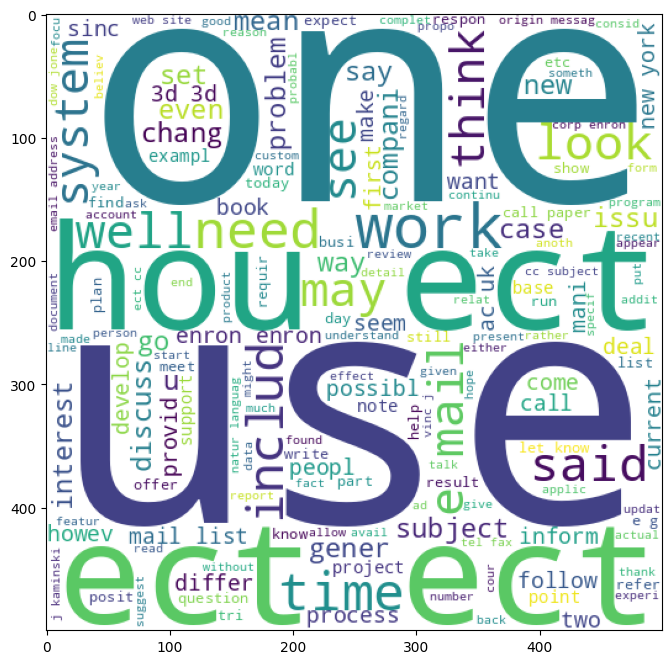

In [51]:
safe_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (20,8))
plt.imshow(safe_wc)

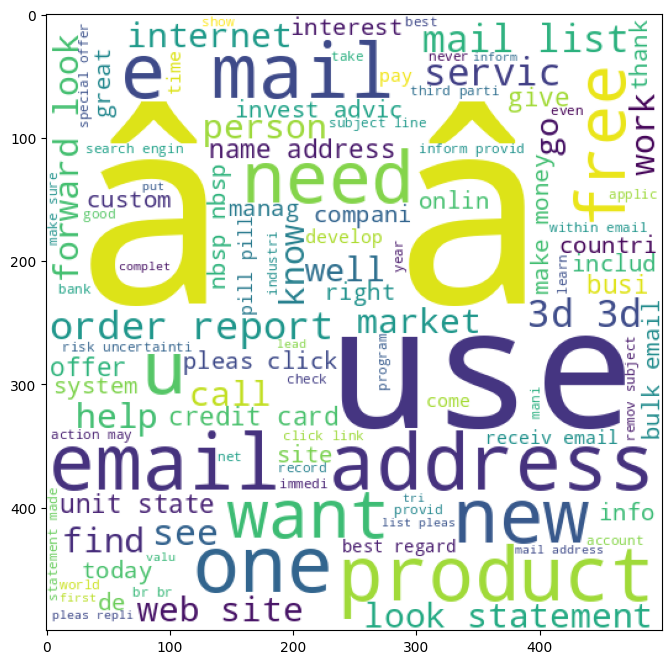

In [52]:
phishing_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (20,8))
plt.imshow(phishing_wc)

In [53]:
#we will use undersapling technique
safe = df[df['target'] == 1]
phishing = df[df['target'] == 0]
safe = safe.sample(phishing.shape[0])

In [54]:
safe.shape, phishing.shape

((6558, 6), (6558, 6))

In [55]:
#lets concatinate both the above data
df = pd.concat([safe, phishing], ignore_index = True)
df.head()

,text,target,num_char,num_words,num_sentences,transformed_text
0,SpamAssassin is hurting democracy!\nOwen\n----...,1,4596,853,24,spamassassin hurt democraci owen level polit p...
1,>JUST as the pyramids of Egypt were built in h...,1,1565,354,12,pyramid egypt built honour great king fit sand...
2,re : i just learned from the it dept atr the m...,1,564,124,5,learn dept atr mpuc session broadcast live int...
3,call for reviewers / new url for call site cal...,1,1957,566,23,call review new url call site call choru http ...
4,\n Guido> Therefore I propose to nuke GBaye...,1,276,56,4,guido therefor propos nuke ad featur guido any...


#MODEL BUILDING

In [56]:
#MODEL BUILDING

In [57]:
#VECTORIZING OUR DATA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [58]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
x.shape, x

((13116, 3000),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.11137459, 0.17795931, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01361845, 0.04352035, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

In [60]:
y = df['target'].values

In [61]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [63]:
x_train.shape, y_train.shape

((10492, 3000), (10492,))

In [64]:
x_test.shape, y_test.shape

((2624, 3000), (2624,))

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, classification_report


In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9233993902439024
[[1244   62]
 [ 139 1179]]
0.9500402900886382


In [68]:
#classification_report
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.90      0.95      0.93      1306\n           1       0.95      0.89      0.92      1318\n\n    accuracy                           0.92      2624\n   macro avg       0.92      0.92      0.92      2624\nweighted avg       0.92      0.92      0.92      2624\n'

In [69]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9584603658536586
[[1257   49]
 [  60 1258]]
0.9625095638867636


In [70]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8990091463414634
[[1280   26]
 [ 239 1079]]
0.9764705882352941


In [71]:
#applying different classification models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [72]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 10, random_state = 2)
bc = BaggingClassifier(n_estimators = 10, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 10, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 10, random_state = 2)
xgb = XGBClassifier(n_estimators = 10, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 10, random_state = 2)

In [73]:
clfs ={
    'SVC' : svc,
    'KN'  : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'GBDT' : gbdt,
    'ETC' : etc,
    'xgb' : xgb

}

In [74]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision


In [75]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9733231707317073, 0.9763358778625955)

In [76]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

  print("For" , name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy -  0.9733231707317073
Precision -  0.9763358778625955
For KN
Accuracy -  0.6303353658536586
Precision -  0.9915254237288136
For NB
Accuracy -  0.9584603658536586
Precision -  0.9625095638867636
For DT
Accuracy -  0.7347560975609756
Precision -  0.9920886075949367
For LR
Accuracy -  0.963795731707317
Precision -  0.9736638264910922
For RF
Accuracy -  0.9485518292682927
Precision -  0.9690721649484536
For AdaBoost
Accuracy -  0.8235518292682927
Precision -  0.9562433297758804
For BgC
Accuracy -  0.9432164634146342
Precision -  0.9598741148701809
For GBDT
Accuracy -  0.7930640243902439
Precision -  0.9754601226993865
For ETC
Accuracy -  0.9542682926829268
Precision -  0.9643410852713178
For xgb
Accuracy -  0.9066310975609756
Precision -  0.9573742540494459


In [77]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.734756,0.992089
1,KN,0.630335,0.991525
0,SVC,0.973323,0.976336
8,GBDT,0.793064,0.975460
4,LR,0.963796,0.973664
5,RF,0.948552,0.969072
9,ETC,0.954268,0.964341
2,NB,0.958460,0.962510
7,BgC,0.943216,0.959874
10,xgb,0.906631,0.957374


In [78]:
input = x[0]
input

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
x.shape

(13116, 3000)

In [80]:
input = input.reshape(1, -1)
result = mnb.predict(input)
result

array([0])

In [81]:
input = input.reshape(1, -1)
result = svc.predict(input)
result

array([1])

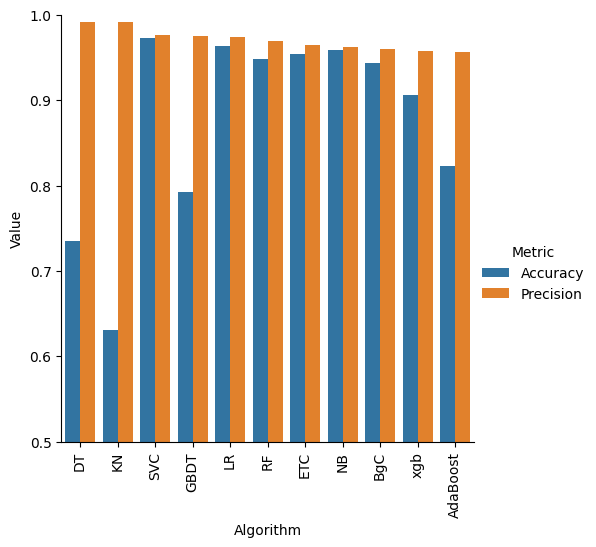

In [85]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'performance_df' with the columns 'Algorithm', 'Accuracy', and 'Precision'

# Melt the DataFrame to combine 'Accuracy' and 'Precision' into a single column
performance_df_melted = pd.melt(performance_df, id_vars=['Algorithm'], value_vars=['Accuracy', 'Precision'], var_name='Metric', value_name='Value')

# Create a bar plot using Seaborn
sns.catplot(x='Algorithm', y='Value', hue='Metric', data=performance_df_melted, kind='bar', height=5)

# Set y-axis limits if needed
plt.ylim(0.5, 1.0)

# Optionally, rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [86]:
#pickle file
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(svc, open('model.pkl', 'wb'))